# Task 3

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
customers_file = r"C:\Users\PRAGNA\Downloads\Customers.csv"
products_file = r"C:\Users\PRAGNA\Downloads\Products.csv"
transactions_file = r"C:\Users\PRAGNA\Downloads\Transactions.csv"

# Loading the datasets
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)

### Feature Engineering

Merge Customer and Transaction Data

In [2]:
# Merge customer information with their transaction data
customer_transactions = transactions.merge(customers, on='CustomerID', how='left')
customer_transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [3]:
# Check the column names of the merged DataFrame
print(customer_transactions.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate'],
      dtype='object')


In [4]:
# Check the columns in the 'customers' dataset
customers.columns


Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

# Step 1: Merge customer transaction data with customer profile data
customer_transactions_aggregated = customer_transactions.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count'),
    AvgTransactionValue=('TotalValue', 'mean')
).reset_index()

customer_transactions_aggregated


,CustomerID,TotalSpend,TransactionCount,AvgTransactionValue
0,C0001,3354.52,5,670.904000
1,C0002,1862.74,4,465.685000
2,C0003,2725.38,4,681.345000
3,C0004,5354.88,8,669.360000
4,C0005,2034.24,3,678.080000
...,...,...,...,...
194,C0196,4982.88,4,1245.720000
195,C0197,1928.65,3,642.883333
196,C0198,931.83,2,465.915000
197,C0199,1979.28,4,494.820000


In [6]:
# Merge with customer profile data
customer_profile_data = customers[['CustomerID', 'Region']]  # using 'Region' as the only profile feature
customer_data = customer_transactions_aggregated.merge(customer_profile_data, on='CustomerID', how='left')

customer_data

,CustomerID,TotalSpend,TransactionCount,AvgTransactionValue,Region
0,C0001,3354.52,5,670.904000,South America
1,C0002,1862.74,4,465.685000,Asia
2,C0003,2725.38,4,681.345000,South America
3,C0004,5354.88,8,669.360000,South America
4,C0005,2034.24,3,678.080000,Asia
...,...,...,...,...,...
194,C0196,4982.88,4,1245.720000,Europe
195,C0197,1928.65,3,642.883333,Europe
196,C0198,931.83,2,465.915000,Europe
197,C0199,1979.28,4,494.820000,Europe


In [7]:
customer_profile_data

,CustomerID,Region
0,C0001,South America
1,C0002,Asia
2,C0003,South America
3,C0004,South America
4,C0005,Asia
...,...,...
195,C0196,Europe
196,C0197,Europe
197,C0198,Europe
198,C0199,Europe


In [8]:
# Create a copy of the original data for after normalization visualization
original_data = customer_data[['TotalSpend', 'TransactionCount', 'AvgTransactionValue']].copy()

In [9]:
# Step 2: Preprocess features
# Normalize numerical features (e.g., TotalSpend, TransactionCount, AvgTransactionValue)
scaler = StandardScaler()
customer_data[['TotalSpend', 'TransactionCount', 'AvgTransactionValue']] = scaler.fit_transform(
    customer_data[['TotalSpend', 'TransactionCount', 'AvgTransactionValue']]
)



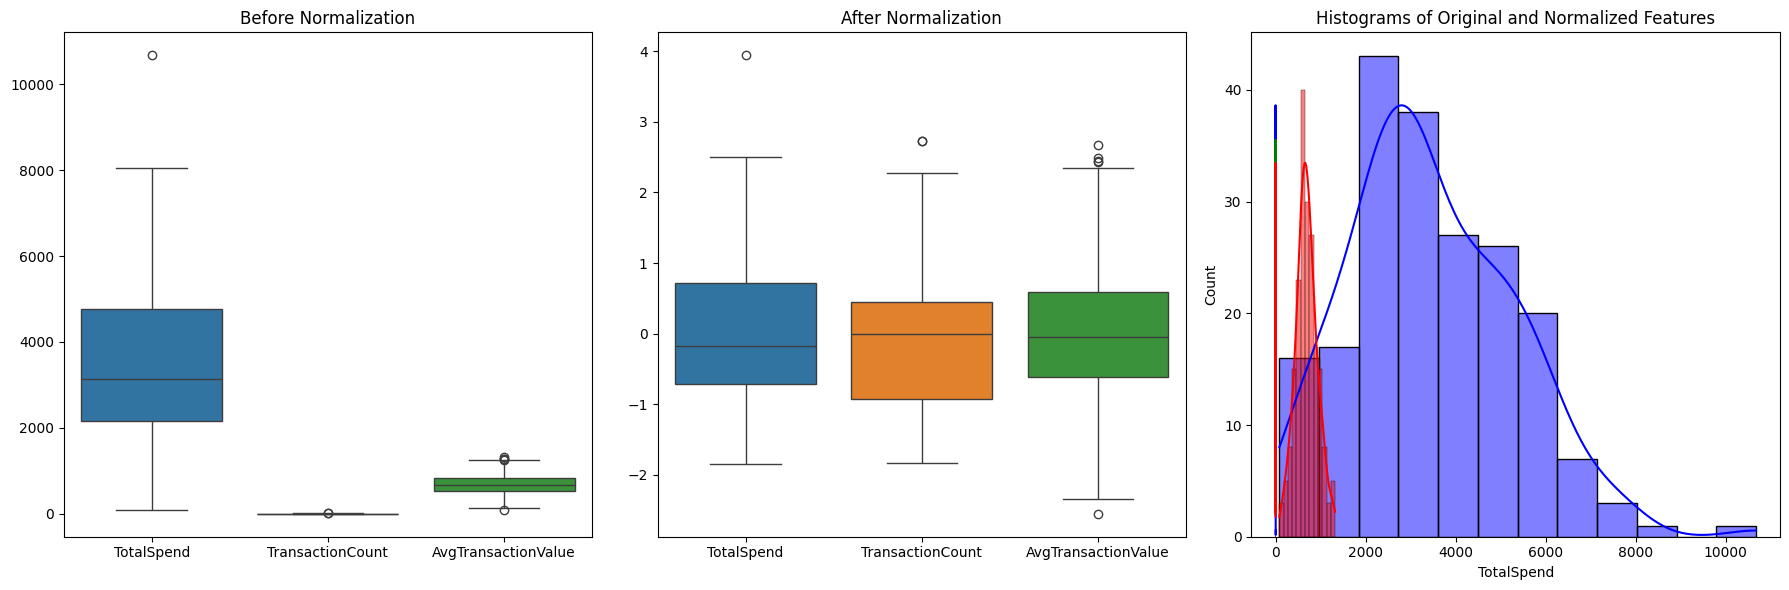

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 2: Visualize the features before and after normalization
# Normalize numerical features
scaler = StandardScaler()
customer_data[['TotalSpend', 'TransactionCount', 'AvgTransactionValue']] = scaler.fit_transform(
    customer_data[['TotalSpend', 'TransactionCount', 'AvgTransactionValue']]
)

# Create the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Before normalization
sns.boxplot(data=original_data, ax=axes[0])
axes[0].set_title('Before Normalization')

# After normalization
sns.boxplot(data=customer_data[['TotalSpend', 'TransactionCount', 'AvgTransactionValue']], ax=axes[1])
axes[1].set_title('After Normalization')

# Plot histograms for the original and normalized data side by side
sns.histplot(original_data['TotalSpend'], kde=True, color='blue', ax=axes[2])
sns.histplot(original_data['TransactionCount'], kde=True, color='green', ax=axes[2])
sns.histplot(original_data['AvgTransactionValue'], kde=True, color='red', ax=axes[2])
sns.histplot(customer_data['TotalSpend'], kde=True, color='blue', ax=axes[2], linestyle='--')
sns.histplot(customer_data['TransactionCount'], kde=True, color='green', ax=axes[2], linestyle='--')
sns.histplot(customer_data['AvgTransactionValue'], kde=True, color='red', ax=axes[2], linestyle='--')
axes[2].set_title('Histograms of Original and Normalized Features')

plt.tight_layout()
plt.show()


In [11]:
# Convert 'Region' (categorical) into one-hot encoding
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

In [12]:
customer_data

,CustomerID,TotalSpend,TransactionCount,AvgTransactionValue,Region_Europe,Region_North America,Region_South America
0,C0001,-0.061701,-0.011458,-0.070263,False,False,True
1,C0002,-0.877744,-0.467494,-0.934933,False,False,False
2,C0003,-0.405857,-0.467494,-0.026271,False,False,True
3,C0004,1.032547,1.356650,-0.076769,False,False,True
4,C0005,-0.783929,-0.923530,-0.040028,False,False,False
...,...,...,...,...,...,...,...
194,C0196,0.829053,-0.467494,2.351666,True,False,False
195,C0197,-0.841689,-0.923530,-0.188326,True,False,False
196,C0198,-1.386975,-1.379566,-0.933964,True,False,False
197,C0199,-0.813993,-0.467494,-0.812176,True,False,False


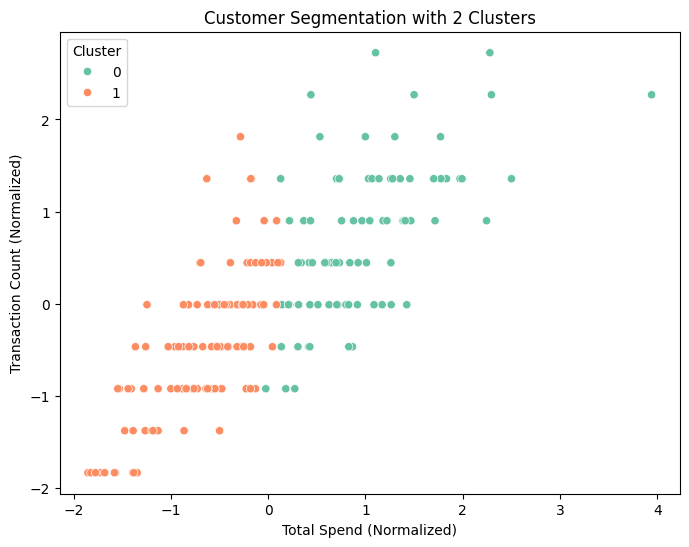

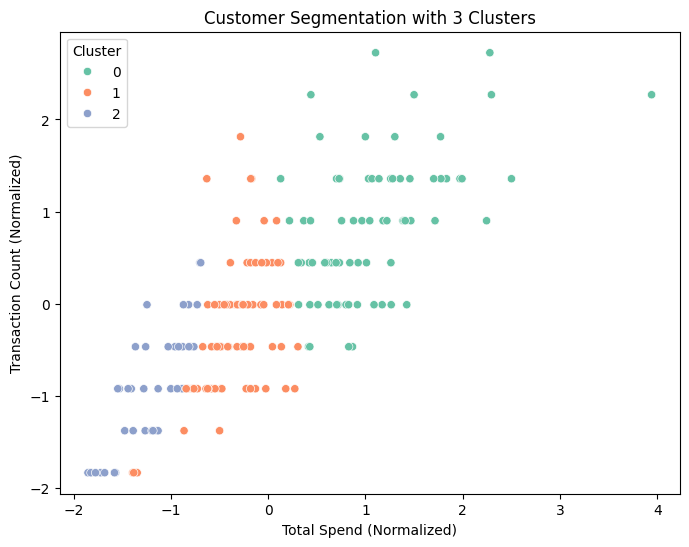

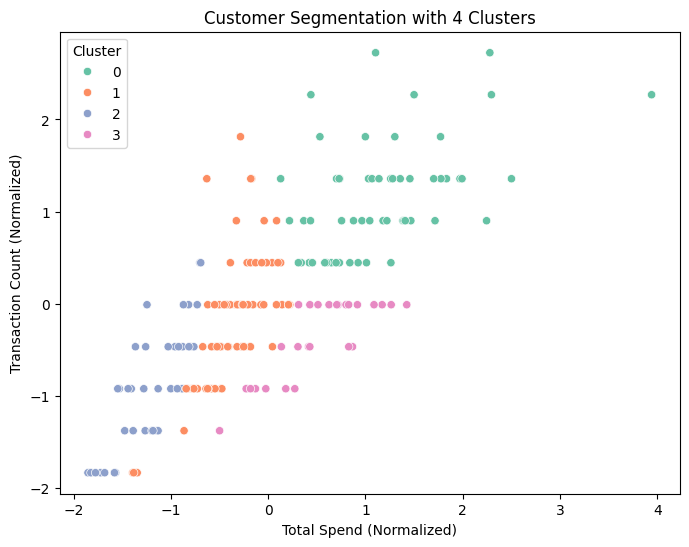

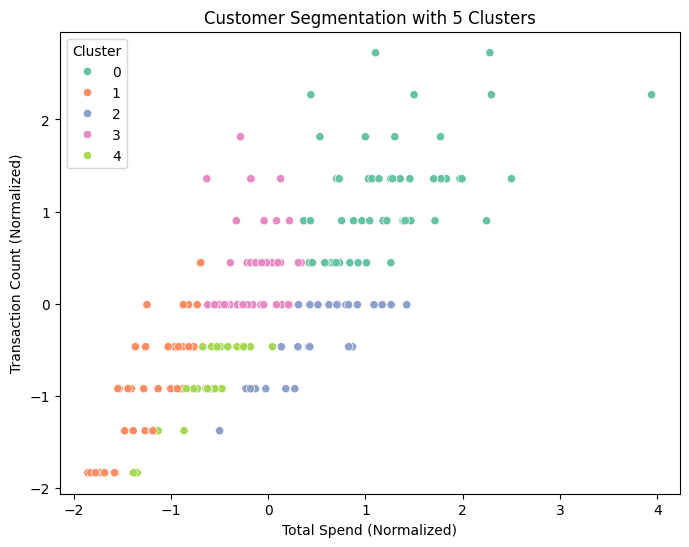

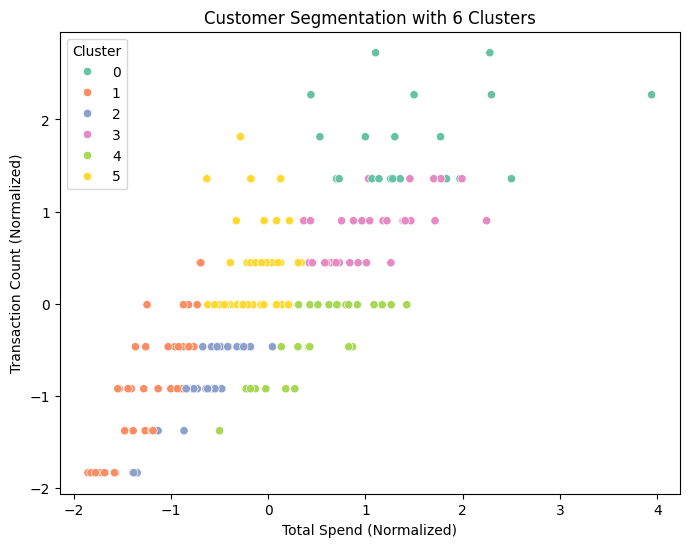

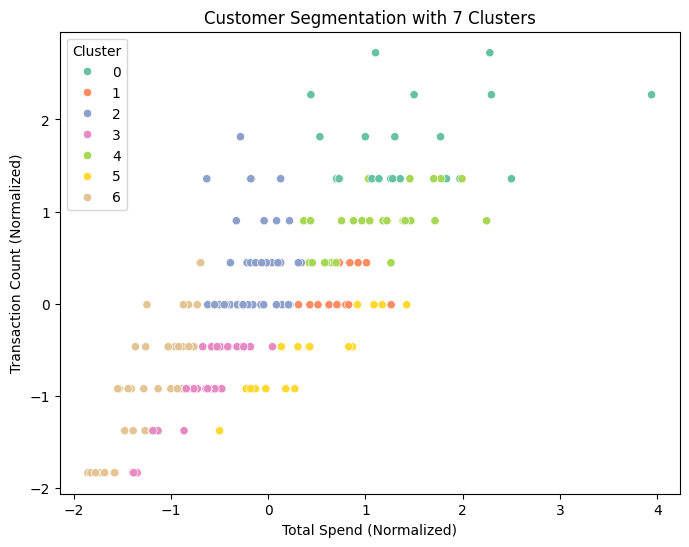

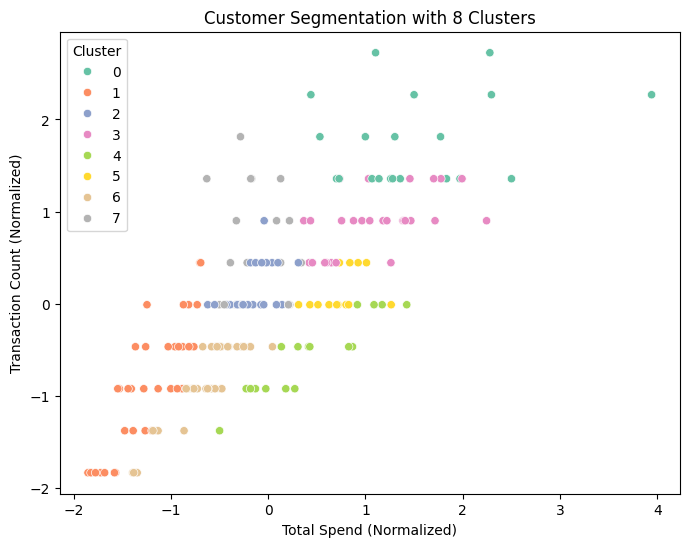

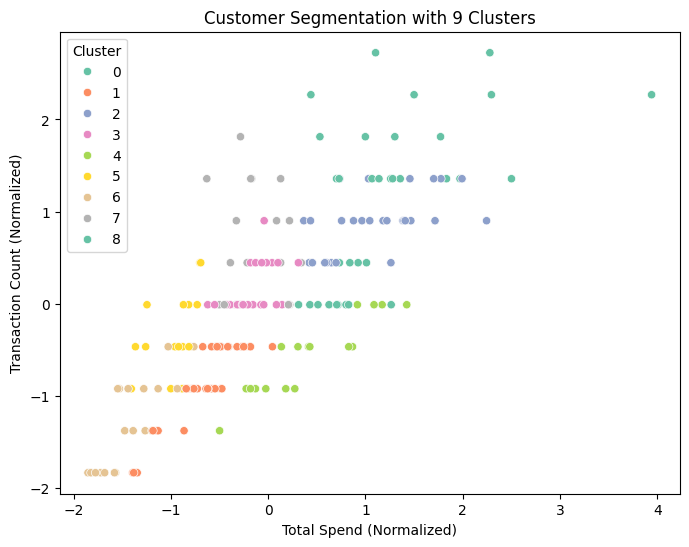

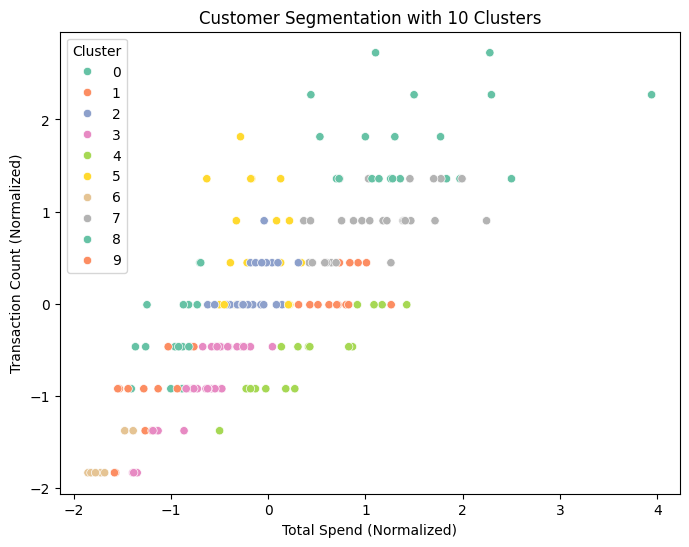

Clusters: 2, Davies-Bouldin Index: 1.223587916018932
Clusters: 3, Davies-Bouldin Index: 1.4923133997243667
Clusters: 4, Davies-Bouldin Index: 1.3811055200462858
Clusters: 5, Davies-Bouldin Index: 1.2945262941123947
Clusters: 6, Davies-Bouldin Index: 1.4584167112060538
Clusters: 7, Davies-Bouldin Index: 1.452197434233716
Clusters: 8, Davies-Bouldin Index: 1.441619661420824
Clusters: 9, Davies-Bouldin Index: 1.4601353612136394
Clusters: 10, Davies-Bouldin Index: 1.4147044314420059


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize an empty list to store the Davies-Bouldin Index for each number of clusters
db_scores = []

# Loop through cluster sizes from 2 to 10
for n_clusters in range(2, 11):
    # Perform KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    customer_data['Cluster'] = kmeans.fit_predict(customer_data.drop('CustomerID', axis=1))

    # Evaluate the clustering with Davies-Bouldin Index
    db_index = davies_bouldin_score(customer_data.drop(['CustomerID', 'Cluster'], axis=1), customer_data['Cluster'])
    db_scores.append((n_clusters, db_index))
    
    # Visualize the clusters for the current n_clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=customer_data['TotalSpend'], y=customer_data['TransactionCount'], hue=customer_data['Cluster'], palette='Set2')
    plt.title(f'Customer Segmentation with {n_clusters} Clusters')
    plt.xlabel('Total Spend (Normalized)')
    plt.ylabel('Transaction Count (Normalized)')
    plt.show()

# Print the Davies-Bouldin Index for each number of clusters
for n_clusters, db_index in db_scores:
    print(f'Clusters: {n_clusters}, Davies-Bouldin Index: {db_index}')


Based on this, it seems that 4 or 5 clusters might be the most optimal choice for our customer segmentation task, as these cluster counts provide the best balance between the compactness and separation of clusters. Let's go with 5.

In [14]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans

# Perform KMeans with 4 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data.drop('CustomerID', axis=1))

# Calculate Silhouette Score for 4 clusters
silhouette_avg = silhouette_score(customer_data.drop(['CustomerID', 'Cluster'], axis=1), customer_data['Cluster'])
print(f'Silhouette Score for 5 clusters: {silhouette_avg}')

# Calculate Calinski-Harabasz Index for 4 clusters
ch_score = calinski_harabasz_score(customer_data.drop(['CustomerID', 'Cluster'], axis=1), customer_data['Cluster'])
print(f'Calinski-Harabasz Index for 5 clusters: {ch_score}')

# Calculate Davies-Bouldin Index for 4 clusters
db_index = davies_bouldin_score(customer_data.drop(['CustomerID', 'Cluster'], axis=1), customer_data['Cluster'])
print(f'Davies-Bouldin Index for 5 clusters: {db_index}')


Silhouette Score for 5 clusters: 0.24422690926472912
Calinski-Harabasz Index for 5 clusters: 83.34985398506534
Davies-Bouldin Index for 5 clusters: 1.2289249617586553
